<h1><center>Determining the optimal number of clusters</center></h1>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sqlite3

In [164]:
boston_data = pd.read_csv("Boston.csv")

## Exploratory Analysis

In [165]:
boston_data.head()

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [166]:
boston_data.columns

Index(['id', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [167]:
boston_data.describe()

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [168]:
boston_data.shape

(506, 15)

In [169]:
boston_data.mean()

id         253.500000
crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
medv        22.532806
dtype: float64

In [170]:
def sstats(data):
    df = (data.mean(),data.std(),data.min(),data.max(),data.median(),data.isnull().sum())
    df = pd.concat(df,axis=1)
    df.columns = ['mean','std','min','max','median','is null']
    return(df)
sstats(boston_data)

,mean,std,min,max,median,is null
id,253.500000,146.213884,1.00000,506.0000,253.50000,0
crim,3.613524,8.601545,0.00632,88.9762,0.25651,0
zn,11.363636,23.322453,0.00000,100.0000,0.00000,0
indus,11.136779,6.860353,0.46000,27.7400,9.69000,0
chas,0.069170,0.253994,0.00000,1.0000,0.00000,0
nox,0.554695,0.115878,0.38500,0.8710,0.53800,0
rm,6.284634,0.702617,3.56100,8.7800,6.20850,0
age,68.574901,28.148861,2.90000,100.0000,77.50000,0
dis,3.795043,2.105710,1.12960,12.1265,3.20745,0
rad,9.549407,8.707259,1.00000,24.0000,5.00000,0


In [171]:
boston_data.isnull().values.any()

#No Missing Values in Boston Dataset

False

In [172]:
# Expensive neighborhoods

boston_data2 = boston_data.sort_values(by='medv', ascending=False)
boston_data2.head(10)

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
283,284,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0
225,226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
369,370,5.66998,0.0,18.10,1,0.6310,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
370,371,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
371,372,9.23230,0.0,18.10,0,0.6310,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
372,373,8.26725,0.0,18.10,1,0.6680,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0
186,187,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
204,205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
257,258,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
195,196,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0


In [173]:
boston_data3 = boston_data.sort_values(by='tax', ascending=False)
boston_data3.head(10)

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
492,493,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1
491,492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
490,491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
489,490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
488,489,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
405,406,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
452,453,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
456,457,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7
455,456,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1
454,455,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9


In [174]:
## You see that some of the highest taxed neighborhoods do not have high property values 

In [175]:
boston_data4 = boston_data.sort_values(by='crim', ascending=False)
boston_data4.head(10)

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
380,381,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
418,419,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
405,406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,411,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,415,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
404,405,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
398,399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
427,428,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9
413,414,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
417,418,25.9406,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4


In [176]:
boston_group = boston_data[['medv','b','crim']]

boston_group['medv'] = pd.cut(boston_data['b'],[0,50,100,150,200,250,300,350,400])
boston_group.groupby(['medv']).mean()

## Greater the proportion of BK in town, greater the median house values

/Users/Saundy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,b,crim
medv,,
"(0, 50]",18.017000,17.651009
"(50, 100]",79.614545,10.190136
"(100, 150]",113.890000,14.023534
"(150, 200]",173.846667,6.324230
"(200, 250]",233.361667,8.197198
"(250, 300]",278.655556,5.792593
"(300, 350]",329.517143,5.591547
"(350, 400]",389.187311,2.397078


In [177]:
## Neighborhoods with higher crime rates per capita have lower median house values at first glance

Text(0.5,0,'Crime rate per capita')

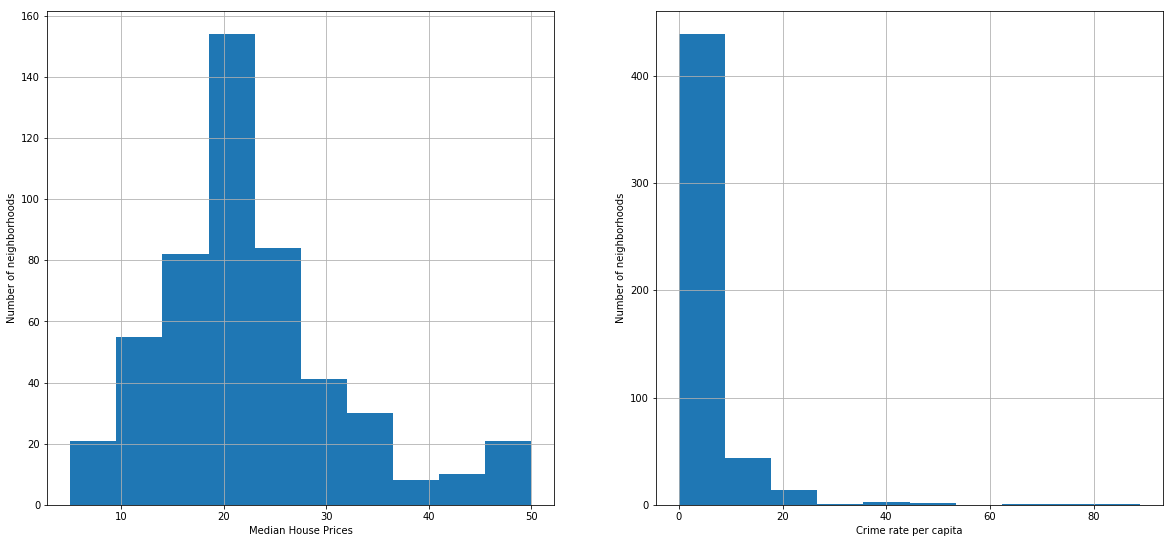

In [178]:
## Plotting histograms
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.title('Histograms')

plt.subplot(2,2,1)
boston_data['medv'].hist()
plt.ylabel('Number of neighborhoods')
plt.xlabel('Median House Prices')

plt.subplot(2,2,2)
boston_data['crim'].hist()
plt.ylabel('Number of neighborhoods')
plt.xlabel('Crime rate per capita')

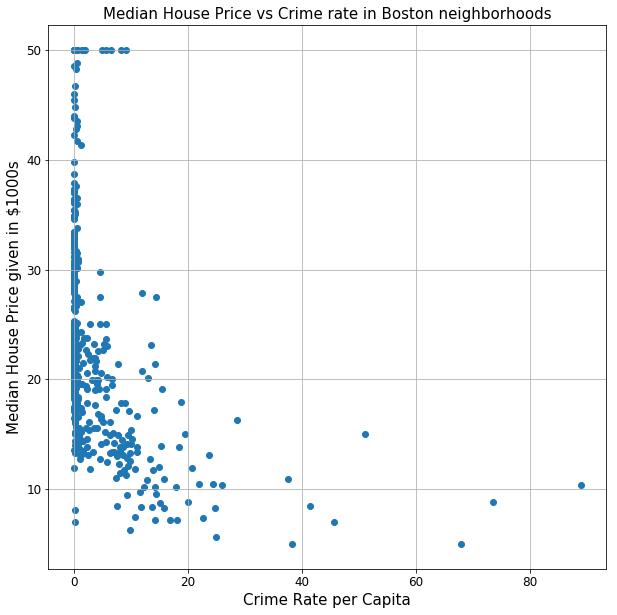

In [179]:
plt.figure(figsize = (10,10))
plt.scatter(boston_data['crim'],boston_data['medv'])

plt.title('Median House Price vs Crime rate in Boston neighborhoods', Size = 15)
plt.xlabel('Crime Rate per Capita',fontsize = 15)
plt.ylabel('Median House Price given in $1000s',fontsize = 15)
plt.tick_params(labelsize = 12)
plt.grid()

In [180]:
corr = boston_data['crim'].corr(boston_data['medv'])
corr

## While we see that as crime rates increase, the median house price decreases,
## the correlation between crime rates and the median house price is not strong enough to say that
## crime rates are the only factor in determining the property value. 

-0.3883046085868114

In [181]:
correl = boston_data.corr()
correl

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
id,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


In [182]:
correl.style.background_gradient(cmap ='RdYlGn')

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
id,1,0.407407,-0.103393,0.399439,-0.00375911,0.398736,-0.0799712,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
chas,-0.00375911,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
nox,0.398736,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.0799712,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
age,0.203784,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626


In [183]:
## The strongest correlations exist between rad and tax which means that as accessability to radial highways increases, the tax imposed on the property are seen to be higher
## The negative correlations between dis and nox suggest that the closer to employment centres a property is, the lower the nitros oxide concentration is in that neighborhood 

# Regression

In [184]:
model1 = smf.ols('medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+b+lstat',data=boston_data).fit()
model1.summary()

## Under the linear regression, all the x variables other than indus and age are significant at the 10% confidence interval

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 07 Dec 2018   Prob (F-statistic):          6.72e-135
Time:                        21:18:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
b              0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
model2 = smf.ols('medv~crim+zn+chas+nox+rm+rad+ptratio+b+lstat',data=boston_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     130.3
Date:                Fri, 07 Dec 2018   Prob (F-statistic):          1.32e-124
Time:                        21:41:53   Log-Likelihood:                -1533.3
No. Observations:                 506   AIC:                             3087.
Df Residuals:                     496   BIC:                             3129.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.4247      4.898      3.761      0.000       8.801      28.049
crim          -0.0756      0.035     -2.174      0.030      -0.144      -0.007
zn            -0.0139      0.012     -1.127      0.260      -0.038       0.010
chas           3.2886      0.908      3.621      0.000       1.504       5.073
nox           -6.4982      3.132     -2.075      0.039     -12.652      -0.344
rm             4.5448      0.424     10.731      0.000       3.713       5.377
rad            0.1300      0.043      3.017      0.003       0.045       0.215
ptratio       -1.0472      0.136     -7.689      0.000      -1.315      -0.780
b              0.0104      0.003      3.632      0.000       0.005       0.016
lstat         -0.4944      0.050     -9.807      0.000      -0.593      -0.395
==============================================================================
Omnibus:                      195.747   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.354
Skew:                           1.650   Prob(JB):                    4.78e-209
Kurtosis:                       8.883   Cond. No.                     8.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## K-Means Clustering

In [185]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [186]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
id         506 non-null int64
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [193]:
from sklearn import linear_model

X = np.array(boston_data.drop(['medv'], 1).astype(float))
Y = np.array(boston_data['medv'])

reg = linear_model.LassoCV()

model = reg.fit (X,Y)
pred = model.predict(X)

print(model.coef_)
print(model.intercept_)
print(model.mse_path_)
print(model.alpha_)

[-9.48149574e-04 -7.46391516e-02  5.00491761e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.81429129e+00  1.04354234e-02
 -8.21395712e-01  2.79727042e-01 -1.51457046e-02 -7.42176221e-01
  8.93933947e-03 -7.04125329e-01]
36.40358032556868
[[ 53.72100722 154.44755359 128.19461458]
 [ 54.42815369 154.44755359 128.19461458]
 [ 55.15504261 154.44755359 128.19461458]
 [ 55.89156426 154.44755359 128.19461458]
 [ 56.62943378 154.44755359 128.19461458]
 [ 57.36191921 154.44755359 128.19461458]
 [ 58.08360735 152.10504074 128.19461458]
 [ 58.79020213 148.60818189 128.19461458]
 [ 59.4783514  145.4148074  128.19461458]
 [ 60.14549804 142.49563142 128.19461458]
 [ 60.78975227 139.82449222 128.19461458]
 [ 61.40978218 137.37799185 128.19461458]
 [ 62.00472008 135.13517953 128.19461458]
 [ 62.57408243 133.07727334 128.19461458]
 [ 63.11770151 131.1874155  128.19461458]
 [ 63.6356673  129.45045695 128.19461458]
 [ 64.12827795 127.85276759 128.19461458]
 [ 66.73094219 126.38206904 134.9477474

In [188]:
from sklearn import metrics
mse = metrics.mean_squared_error(Y,pred)

def ic(A,B,k=2):
    reg = linear_model.LinearRegression()
    model = reg.fit (A,B)
    pred = model.predict(A)
    mse = metrics.mean_squared_error(B,pred)
    retp = k*A.shape[1]+A.shape[0]*np.log(mse)
    return retp

ic(X,Y)
ic(X,Y,k=np.log(X.shape[0]))

1647.295897383857

In [189]:
from sklearn.model_selection import train_test_split

mse = np.zeros((10,))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    model = reg.fit(X_train,y_train)
    mse[i] = metrics.mean_squared_error(y_test,model.predict(X_test))
print(np.sqrt(mse.mean()))

5.13320993225423


In [190]:
from sklearn.model_selection import cross_validate

cv = cross_validate(reg, X, Y, scoring=metrics.make_scorer(metrics.mean_squared_error), cv=5, return_train_score=False)
cv['test_score']

array([29.72588191, 33.89861155, 53.83435818, 64.82941036, 24.45164559])

In [191]:
for i in range(10):
    kmeans = KMeans(n_clusters=2, random_state=0,).fit(boston_data)
kmeans.cluster_centers_
kmeans.labels_
wss = kmeans.inertia_
wss

wss=np.zeros((10,)) # determine the size of the array
for i in range(10):
    kmeans = KMeans(n_clusters=i+1, random_state=0).fit(boston_data)
    wss[i] = kmeans.inertia_

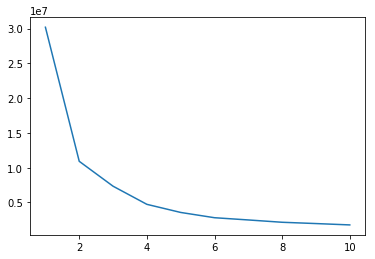

In [192]:
fig = plt.figure()
plt.plot(np.arange(1,11),wss)
plt.show()

#### The above plot shows that the optimal number of clusters that should be input in to the k-means algorithm is 2.